## RMSE和MAE存在的问题

**对于不同种类的问题，利用MAE或RMSE得到的结果可能相同，但是反映情况可能不同。**

比如对于学生成绩问题和房产价格问题，利用RMSE计算得到的结果都是10。但不能说算法作用与这两个问题上的性能相同。因为这是两个不同的问题。

**解决方法：R Squared**

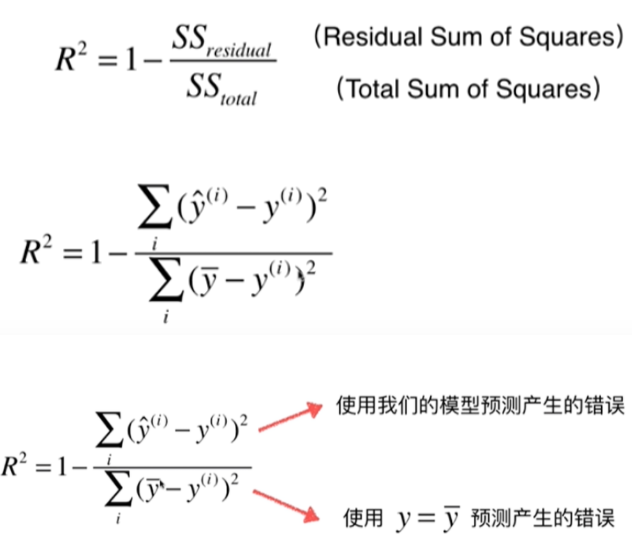

**直观理解**：衡量了我们模型没有产生错误的指标，即模型的拟合程度。

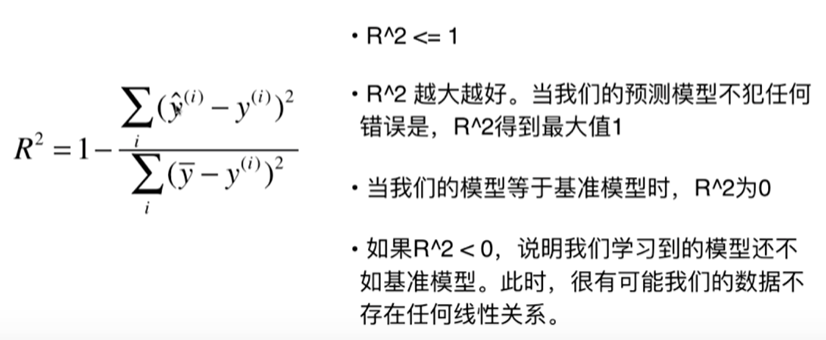

## R squared 的另一种表示

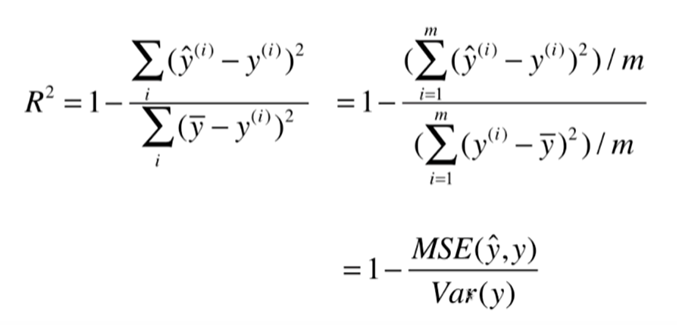

## 实现R Squared

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

boston = datasets.load_boston()
x = boston.data[:, 5] # 只使用房间数量这个特征
y = boston.target

# 筛选数据
x = x[y < 50.0]
y = y[y < 50.0]

In [2]:
from playML.model_selection import train_test_split
from playML.SimpleLinearRegression import SimpleLinearRegression2

x_train, x_test, y_train, y_test = train_test_split(x, y, seed=666)

reg2 = SimpleLinearRegression2()
reg2.fit(x_train, y_train)

reg2.a_, reg2.b_

(7.8608543562689555, -27.459342806705543)

In [4]:
y_predict = reg2.predict(x_test)
y_predict

array([23.09381156, 23.14883754, 19.20268865, 29.02089574, 25.6014241 ,
        5.06887252, 24.66598243, 26.47397893, 15.52380881, 28.38416654,
       17.29250104, 13.0633614 , 23.99780981, 21.37228445, 23.29033292,
       21.66313607, 21.22292822, 19.94946982, 22.41777808, 25.17693796,
       19.51712283, 24.14716604, 24.57165218, 19.07691498, 23.14097668,
       28.78507011, 20.46042535, 18.18863844, 15.93257324, 29.46110359,
       31.65428195, 19.36776659, 16.77368466, 38.07659996, 19.72936589,
       20.99496345, 18.27510784, 24.22577459, 21.67099692, 22.7086297 ,
       21.22292822, 19.17910609, 15.41375685, 19.41493172, 16.5771633 ,
       23.13311583, 23.71481905, 30.13713706, 17.99211708, 24.69742585,
       19.43065343, 25.4284853 , 22.71649055, 16.53785903, 19.13194096,
       18.82536764, 22.15836989, 18.55809859, 25.03544258, 29.52399042,
       18.75461995, 19.69006162, 18.59740287, 14.58836714, 18.81750679,
       24.65812158, 20.83774636, 19.77653102, 27.88893272, 19.32

In [5]:
# 实现R squared
from playML.metric import mean_squared_error

1 - mean_squared_error(y_test, y_predict) / np.var(y_test)

0.6129316803937322

## 调用scikit-learn中的r2_score

In [6]:
from sklearn.metrics import r2_score

r2_score(y_test, y_predict)

# scikit-learn中的LinearRegression中的score返回r2_score

0.6129316803937324

## 封装我们自己的r2_score

In [7]:
from playML.metric import r2_score

r2_score(y_test, y_predict)

0.6129316803937322

## 在我们的SimpleLinearRegression中添加score

In [8]:
reg2.score(x_test, y_test)

0.6129316803937322